In [148]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [149]:
#Created Correlation Matrix and heatmap, see corr_matrx.py file
#list of ETFs
tickers = ['VTI','GLD','BND','VT','IYR','AIA','VEU','AAXJ','ILF','EZU','EEM','FM','VWO','UUP','GSG', 'BWX']

In [150]:
#Choose Dates
START_DATE = '2013-01-24'
END_DATE = '2023-01-24'

In [151]:
#monthly simple returns
df = yf.download(tickers, start=START_DATE, end=END_DATE)['Adj Close']\
 .resample('M') \
 .last() \
 .pct_change() \
 .dropna()

[*********************100%***********************]  16 of 16 completed


In [152]:
#create correlation matrix and iterate over matrix to print final output for top correlation pairs in rank order. function called at end of script
def corrank(X: df):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False).head(20)[['pairs', 'corr']])

In [153]:
#setup heat map design
cmap = sns.diverging_palette(220, 150, as_cmap=True)

In [154]:
#mask redundancy
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
np.fill_diagonal(mask, False)


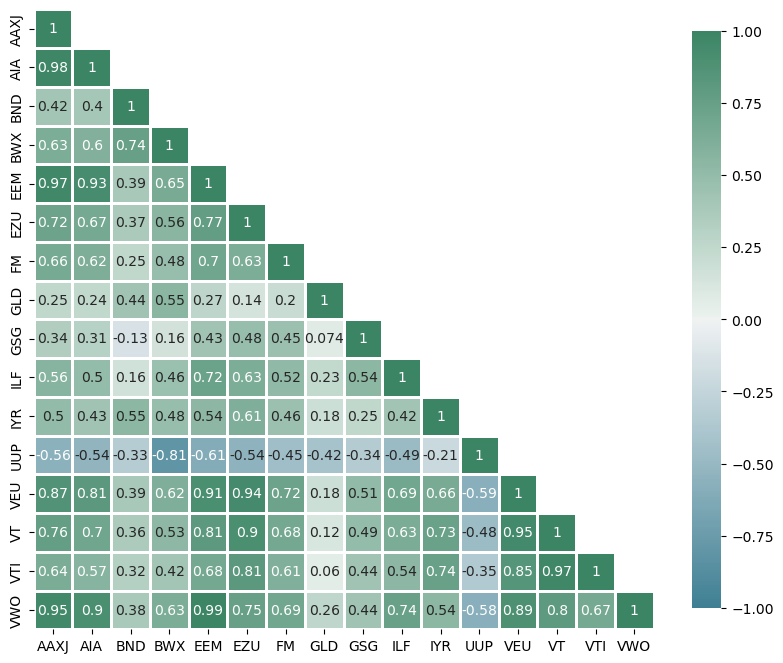

In [155]:
#refine heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(
        data=df.corr(), linewidths=1,  #width of lines separating the matrix cells
        square=True,cmap=cmap,
        vmax=1,  #define the max of corr scale
        vmin=-1, #define the min of corr scale
        center=0, cbar_kws={"shrink": .75}, mask=mask, annot=True)
plt.show()

In [156]:
pair = ['VT', 'EEM'] #choose pair from terminal output (I chose lower correlation)
#choose dates
START_DATE = '2013-01-31'
END_DATE = '2023-12-31'

In [157]:
#pull data and calculate returns
x = yf.download(pair, start=START_DATE, end=END_DATE)['Adj Close']\
 .resample('M') \
 .last() \
 .pct_change() \
 .dropna()

[*********************100%***********************]  2 of 2 completed


In [158]:
y = x.pop('VT') #y is long position. you must type this in.
x = sm.add_constant(x) #short position
model = sm.OLS(y, x).fit() #OLS regression
model.summary() #regression output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VT   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.23e-29
Time:                        22:19:50   Log-Likelihood:                 278.69
No. Observations:                 122   AIC:                            -553.4
Df Residuals:                     120   BIC:                            -547.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.002      2.658      0.009       0.002       0.010
EEM            0.6851      0.046     15.037      0.000       0.595       0.775
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.694
Skew:                           0.182   Prob(JB):                        0.707
Kurtosis:                       3.065   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""